<a href="https://colab.research.google.com/github/Daviedavie100/freeCodeCamp/blob/main/boilerplate_medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('/content/sample_data/medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df['cholesterol'], df['gluc']= np.where(df['cholesterol']>1,1,0), np.where(df['gluc']>1,1, 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1


In [11]:
df.loc[:,'overweight'] =df.loc[:, 'weight']/(np.sqrt(df.loc[:, 'height']/100))
df['overweight'] = df.apply(lambda x: 1 if x['overweight']>25 else 0 , axis=1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [144]:
#melt
value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
id_vars='cardio'#['id',	'age',	'sex',	'height',	'weight',	'ap_hi',	'ap_lo', 'cardio']
df_cat = df.melt(id_vars=id_vars, value_vars=value_vars, value_name='values', var_name='variables')
#df_cat.drop_duplicates(inplace=True)
df_cat

,cardio,variables,values
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [147]:
a=df_cat.groupby(['variables','cardio','values'])['variables'].count().reset_index(name='total')
a
#df_cat=df_cat.sort_values(by='cardio')
#df_cat

,variables,cardio,values,total
0,active,0,0,6378
1,active,0,1,28643
2,active,1,0,7361
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,1941
6,alco,1,0,33156
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,5691


In [152]:
cardio_0=a[a['cardio']==0]
#pivot_table(values='rrrr', index = 'rrrr', columns='code', aggfunc='count')
cardio_0

,variables,cardio,values,total
0,active,0,0,6378
1,active,0,1,28643
4,alco,0,0,33080
5,alco,0,1,1941
8,cholesterol,0,0,29330
9,cholesterol,0,1,5691
12,gluc,0,0,30894
13,gluc,0,1,4127
16,overweight,0,0,3
17,overweight,0,1,35018


In [151]:
cardio_1=a[a['cardio']==1]
cardio_1

,variables,cardio,values,total
2,active,1,0,7361
3,active,1,1,27618
6,alco,1,0,33156
7,alco,1,1,1823
10,cholesterol,1,0,23055
11,cholesterol,1,1,11924
14,gluc,1,0,28585
15,gluc,1,1,6394
18,overweight,1,0,6
19,overweight,1,1,34973


<Figure size 1008x432 with 0 Axes>

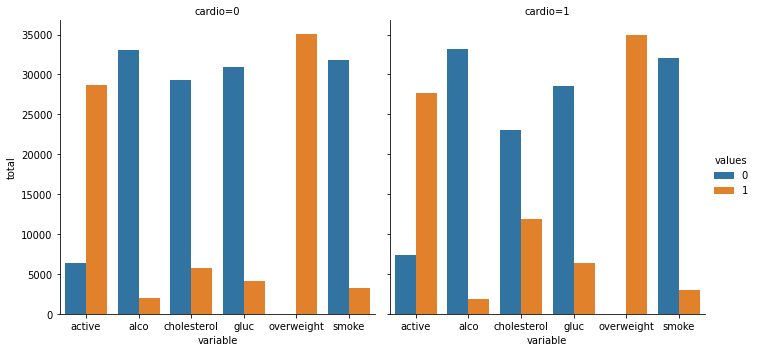

In [196]:
fig= plt.figure(figsize=(14,6))

g = sns.catplot(data=a, x="variables", y="total", col="cardio", kind="bar", hue='values')
g.set_ylabels('total')
g.set_xlabels('variable')
g.set_titles('{col_var}'+ '=' '{col_name}')
#g.set(ylim=(0, 1))
#g.despine(left=True)


plt.show();

In [197]:
'''Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile'''

"Clean the data. Filter out the following patient segments that represent incorrect data:\ndiastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))\nheight is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))\nheight is more than the 97.5th percentile\nweight is less than the 2.5th percentile\nweight is more than the 97.5th percentile"

In [12]:
df[df['ap_lo'] <= df['ap_hi']]
#df.loc[(df['height'] >= df['height'].quantile(0.025)) | (df['height'] <= df['height'].quantile(0.975))]
df[df['height'] >= df['height'].quantile(0.025)]
df[df['height'] < df['height'].quantile(0.975)]
df[df['weight'] >= df['weight'].quantile(0.025)]
df[df['weight'] < df['weight'].quantile(0.975)]
#df.loc[(df['weight'] >= df['weight'].quantile(0.025)) | (df['weight'] <= df['weight'].quantile(0.975))]


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [13]:
corr=df.corr()#(method='spearman')
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003457,0.003154,-0.003038,-0.001830,0.003356,-0.002529,0.005290,0.002844,-0.003699,0.001210,0.003755,0.003799,-0.001477
age,0.003457,1.000000,-0.022609,-0.081515,0.053684,0.020764,0.017647,0.129697,0.088099,-0.047633,-0.029723,-0.009927,0.238159,0.000171
sex,0.003154,-0.022609,1.000000,0.498221,0.155115,0.005985,0.015195,-0.034729,-0.018318,0.337664,0.170682,0.005991,0.007953,-0.004888
height,-0.003038,-0.081515,0.498221,1.000000,0.290968,0.005488,0.006150,-0.048532,-0.019400,0.187989,0.094419,-0.006570,-0.010821,0.001724
weight,-0.001830,0.053684,0.155115,0.290968,1.000000,0.030702,0.043710,0.137981,0.120407,0.067780,0.067113,-0.016867,0.181660,0.040511
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.024730,0.012886,-0.000922,0.001408,-0.000033,0.054475,-0.000005
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043710,0.016086,1.000000,0.026504,0.013747,0.005186,0.010601,0.004780,0.065719,-0.005885
cholesterol,0.005290,0.129697,-0.034729,-0.048532,0.137981,0.024730,0.026504,1.000000,0.383252,0.017839,0.043610,0.005911,0.205536,-0.005038
gluc,0.002844,0.088099,-0.018318,-0.019400,0.120407,0.012886,0.013747,0.383252,1.000000,0.002087,0.020606,-0.009061,0.090876,-0.002282
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067780,-0.000922,0.005186,0.017839,0.002087,1.000000,0.340094,0.025858,-0.015486,-0.000919


In [14]:
#mask = np.zeros_like(corr)

#mask[np.triu_indices_from(mask)] = True


mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

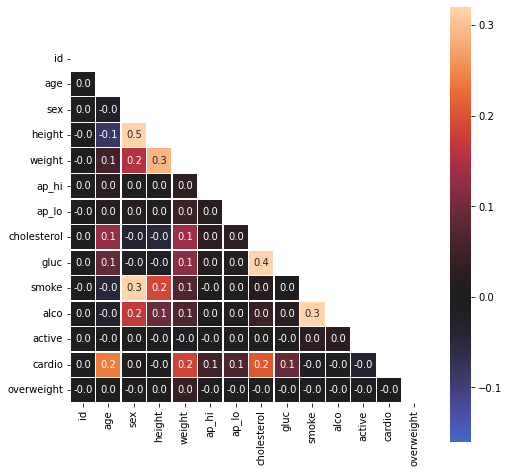

In [22]:
fig,ax = plt.subplots(figsize=(8,8))

sns.heatmap(corr,center = 0, fmt = ".1f", square = True, vmin=-0.16, vmax=.32, annot= True, Linewidth = .3, mask=mask);

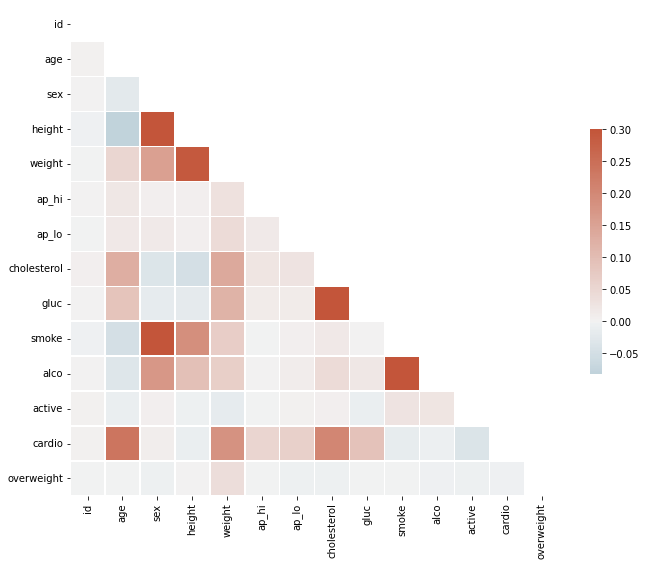

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})